# Regression Tutorial

# Linear Regression

Regression analysis encompasses a number of ways to estimate a **dependent** (or *outcome*) variable from one or more **independent** (or *predictor*) variables. Simply put, by building a regression model, we are trying to describe the relationship between variables.

**Linear regression** is a fairly simple model in which we assume the relationship between variables has a **fixed slope**, and is therefore "linear." Linear regression can have multiple independent variables, but for now we'll start with using just one.

## Example problem

For our example, we'll use linear regression to predict housing prices in Portland, Oregon. Imagine you are trying to sell a house and you want to find a good price to list it at. One obvious thing to do is to find prices that houses have sold for in the past. House prices differ greatly, so we need to find characteristics of houses that impact sale price. A simple, numerical quality that should increase the value of a house is floor area.

Our data set includes both square feet and house value. To see the relationship between these two variables, we can plot them using matplotlib. Note that the area is in column 0, and the price is in column 2.

### Load and visualize data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]
plt.plot(x_sqft, y_value, 'ro'); plt.xlabel("House Square Footage"); plt.ylabel("Market value (USD)");

There definitely seems to be a trend: houses with greater area tend to have higher market value. That said, it's not a perfect predictor.

If we draw a line through the data following this trend, we could use it to predict the value of other houses. This is called a **trend line**. For example, even if we don't have a house in the dataset with 2800 sqft, we could use our line to estimate the house's value. It can be easy to draw a convincing trend line by hand, as shown in the image below.

![](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression1.JPG)

This looks like a good estimate for our data. However, we might want to be certain that this trend line is the best possible fit. Ideally, it should be as close as possible to as many data points as possible. Each point has an error associated with it: the vertical distance between the trend line's prediction and the actual data. With linear regression, we seek to minimize the total amount of error.

![image.png](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression2.JPG)

In our case, $x$ is square footage and $y$ is market value. Then we can define the error for any datapoint as:
$$ y_{actual} - y_{predicted} $$


In order to count negative and positive errors without them cancelling each other out, we take the squared error, or 
$$ (y_{actual} - y_{predicted})^2 $$


Then for the list of market values $y_1,y_2,...,y_n$ and square footages $x_1,x_2,...,x_n$ the **total error** (or *cost*) of our line is just the sum of each error term.
 $$ \text{Total error = } \sum^n_{i=1} (y_i - y_{predicted})^2 $$
$$ = \sum^n_{i=1} (y_i - (mx_i+b))^2$$

In linear regression, there can only one $m$ and $b$ that minimize the total error. If we plot the total error against either $m$ or $b$ as a variable, it turns out we get a U-shaped plot. This curve has changes from increasing to decreasing at a single point. At this point, the curve flattens out, and the derivative is equal to 0.

![image.png](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression3.JPG)

This means we can find our best fit by taking the derivative of the equation for total error. We won't go through the full derivation here, but feel free to give it a try if you're feeling adventurous. Setting the derivative equal to 0 and solving for $b$ and $m$ produces formula for the best fit trend. Here are the results:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

<br></br>
To apply this to our example, we can express these formula as a code function and apply it to the entire range of data. In the exercise notebook, you'll be doing the calculations and plotting yourself. For now, let's take a look at sklearn's LinearRegression.

### Creating model using sklearn

In [ ]:
import sklearn.linear_model as lm

# Create a linear regression model
model = lm.LinearRegression()

# Reshape the data to the required format for lm's fit function
# We have to reshape the data into a column list like [[3],[3],[3]...] instead of [3, 3, 3,...]
x_sqft_shaped = x_sqft.reshape(-1,1)

# Fit onto the results
housepredictor = model.fit(x_sqft_shaped,y_value)

Let's print the values for m and b. When you move one to the exercise notebook, your m and b values should match the ones generated with sklearn's.

In [ ]:
print(housepredictor.coef_,housepredictor.intercept_)

We can also print the R^2 value of our model.

In [ ]:
housepredictor.score(x_sqft_shaped,y_value)

Next we will consider the case of 2 variables: floor area again and this time number of bedrooms as well. Recall 0 = floor area, 1 = number of bedrooms, and 2 = sale price.

The equation for a trend is similar to before. There is still only one $b$, but now we have a unique $m$ for each $x$ variable:
$$ y = m_1x_1+m_2x_2+b $$

The error will look a little different, since now we are working in multiple dimensions.

Using a library means we don't have to find the total error for each possible plane ourselves. Our data already includes the number of bedrooms in column 1, so all we need to do is reshape the data and hand it to the fit function.

In [ ]:
# Get the number of bedrooms
x_rooms = data_array[:,1]

# Reshape the data to the required format for lm's fit function
x_rooms_shaped = x_rooms.reshape(-1,1)

# Concatenate the data into a single array
x_combined = np.concatenate((x_sqft_shaped,x_rooms_shaped),axis=1)

# Create a new linear regression model
model_2d = lm.LinearRegression()

# Run fit for two independent variables
housepredictor_2d = model_2d.fit(x_combined,y_value)

Generally speaking, more dimensions should give us a better predictive value. How can we tell if this new predictor is better? One metric we can look at is $R^2$. Called the "coefficient of determination," $R^2$ describes a bit more than just correlation. Instead, it shows how much variance in dependent data is predictable from variance in independent data. More simply, its a metric for "goodness of fit."

Let's compare the $R^2$ values for both trend models.

In [ ]:
print(housepredictor.score(x_sqft_shaped,y_value))
print(housepredictor_2d.score(x_combined,y_value))

Interestingly, even though we added an entire new variable, the $R^2$ value barely increased using the 2D model. We can speculate as to why. Intuitively, houses with more bedrooms also have greater floor space. The two are likely correlated. This means adding it to the model didn't add much new information.

Another way of thinking about it is this: consider a point with a large error on the sqft-value trend. Perhaps the house has a large area, but is valued lower than expected. We may expect that large house to also have a large number of bedrooms. However, if number of bedrooms raises the price, this house will also look undervalued from that metric as well. Therefore adding a second dimension hasn't changed the fact that this point is an outlier in our model.

# Logistic Regression

![](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression4.jpeg)

Logistic regression analysis is used for predicting the outcome of a categorical variable. Typically these problems arise in terms of classifaction. The probabilities describing the possible outcomes of a single trial are modeled, as a function of the predictor variables, using a logistic function. Rather than modeling the probabilities directly, we model a function of the probabilities that is not restricted between 0 and 1. In particular, we model the log of the odds, rather than the actual probabilities. Remember the odds are defined to be the probability that the event occurs, divided by the probability that it does not occur. 

As seen in the images above, the logisitic function seems to have an 'S' like shape instead of a straight line. To understand why this is, we need to delve in to some mathematics. 

We consider a special function called the sigmoid function:

$$\sigma(a) = \frac{exp (a)}{1+exp (a)}$$

This function produces an 'S' shape as shown above and its range lies between 0 and 1. A perfect fit for our model. We have an predictor $X$ which we would also like to relate to our model. So we do the following Let $a = \beta_0 + \beta_1X$. Then it follows

$$\frac{exp (\beta_0 + \beta_1X)}{1+exp (\beta_0 + \beta_1X)}.$$
  

The logistic regression model expresses the population proportion p of individuals with a given attribute as a function of a single predictor variable X. The model assumes that $p = p(X)$ is related through the following:

$$p = \frac{exp (\beta_0+\beta_1X)}{1+exp (\beta_0 + \beta_1X)}$$

equivalentally

$$ln(\frac{p}{1-p})= \beta_0 +\beta_1X $$

<br></br>
  The expression $\frac{p}{1-p}$ is known as the odds.

 The logistic model assumes that the log-odds of success is linearly related. Mathematically, this makes sense if we assume $ln(\frac{p}{1-p})$ = $y$ then we have$ y =  \beta_0 +\beta_1X$ a straight line!
to $X$. 

Graphs of the logistic model relating $p$ to $X$ are given below. 

![](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression5.jpg)


Similarly to linear line of best fit, we would like to find our logisitical best fit. For this, we use the **Maximum Likelihood Estimation**. The mathematics gets a bit rigorious for this, however, similar to setting the derivative zero for our best fit trends. If you're curious here's a link that is very interesting that delves into the topic!

http://statweb.stanford.edu/~susan/courses/s200/lectures/lect11.pdf



## Example problem

In this dataset, survival times are given for 30 patients who died from **Acute Myelogenous Leukaemia**. Also measured was the patient's **white blood cell count (WBC)** at the time of diagnosis. The patients were also factored into 2 groups according to the presence or absence of a morphologic characteristic of white blood cells. Patients termed **AG positive** were identified by the presence of Auer rods and/or significant granulation of the leukaemic cells in the bone marrow at the time of diagnosis.

We are interested in modelling the **probability p of surviving at least one year as a function of WBC and AG**.

### Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import seaborn as sns

url = "https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/leukdata.csv"
data = pd.read_csv(url)

"""
    nres: number surviving at least one year  
    ag: 1 for AG positive, 0 for AG negative  
    wbc: white cell blood count   
"""

data.head(30)

,nres,ag,wbc
0,1,1,75
1,1,1,230
2,1,1,260
3,1,1,430
4,1,1,700
5,1,1,940
6,1,1,1000
7,1,1,1050
8,1,1,10000
9,1,0,300


### Visualize data

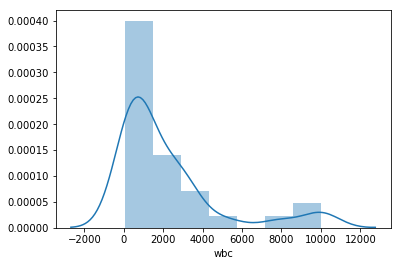

In [ ]:
sns.distplot(data.wbc)

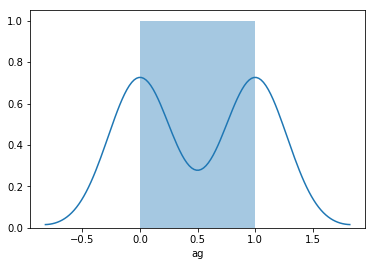

In [ ]:
sns.distplot(data.ag)

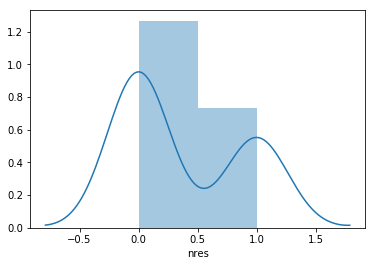

In [ ]:
sns.distplot(data.nres)

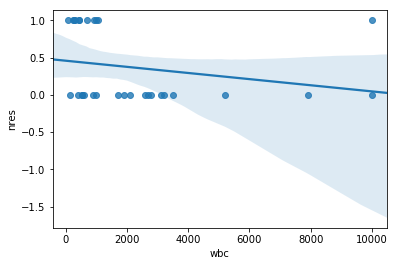

In [ ]:
# Relationship between wbc and nres
sns.regplot(data.wbc, data.nres)

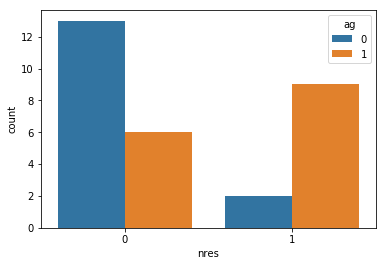

In [ ]:
sns.countplot(data.nres, hue=data.ag) 

As you can see, the scatterplot between wbc and nres best potrays the need for logisitic regression over linear regression.

First, you should assess if variables need to be transformed or normalized. If so, change the variable(s).

Notice from the univariate analysis above the skewness of the WBC distribution. Find a transformation of the WBC variable to achieve a normal distribution. Note that power transforms are a family of parametric, monotonic transformations that aim to transform data from any distribution to as close to a Gaussian/Normal distribution as possible in order to stabilize variance and minimize skewness.

Here's some more in-depth documentation: https://scikit-learn.org/stable/modules/preprocessing.html

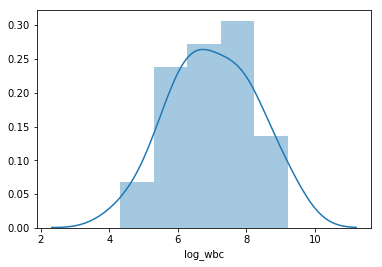

In [ ]:
data['log_wbc']= np.log(data.wbc)
sns.distplot(data.log_wbc)

Now that we have preprocessed the data, we can implement the model.

The model we're considering for this analysis is

$$log(\frac{p}{1-p})= \beta_0 +\beta_1log(WBC) + \beta_2AG$$
 

The model is best understood by separating the AG+ and AG− cases. For AG− individuals, AG=0 so the model reduces to

$$log(\frac{p}{1-p})= \beta_0 +\beta_1log(WBC) + \beta_2*0 =  \beta_0 +\beta_1log(WBC)$$.

The model for AG+ individuals (AG = 1) is

$$log(\frac{p}{1-p})= \beta_0 +\beta_1log(WBC) + \beta_2*1 =  (\beta_0+\beta_2) +\beta_1log(WBC)$$.

The reduced or simple logisitic model is without AG and where the log odds of surviving at least one year is related to log(WBC) linearly. When $\beta_2 = 0$ implies that AG level has no effect on the survival probability once log(WBC) has been accounted for. Including AG implies the log odds of surviving at least one year and log(WBC) are a linearly associated, with different slopes for the AG levels. $\beta_0$ and $\beta_0 + \beta_2$ are the y-intercepts for the population logistic regression lines for AG− and AG+, respectively. Both prediction lines have a common slope, $\beta_1$. The $\beta_2$ estimate for the AG  is the difference between intercepts for the AG+ and AG− regression lines. The image below shows the assumed relationship for a given $\beta_1$ < 0. The population regression lines are parallel on the logit scale only, and preserved on the probability scale.

![](https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_public/master/Images/Week1/regression6.png)

### Create model

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split
X_cols = ['ag','log_wbc']
y_col = 'nres'

test_size = 0.15
X_train, X_val, y_train, y_val = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=1)

In [ ]:
# Defining model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
# Printing accuracy of testing & training data
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.0
Validation Accuracy is  80.0
